welcome to chapter 2 of pytorch


In [97]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [98]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
x=torch.arange(start, end, step).unsqueeze(dim=1)
y=x*weight+bias
x,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [99]:
len(x),len(y)

(50, 50)

splitting data into train and test dataset

In [100]:
split=int(0.8*len(x))
x_train=x[0:split]
y_train=y[0:split]

x_test=x[split:]
y_test=y[split:]


using figure to understand the dataset using matplotlib

In [101]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,color="g",s=10,label="train") #s=size
  plt.scatter(test_data,test_label,color="b",label="test")

  if predictions is not None:
     plt.scatter(test_data,predictions,color="r",s=10,label="preditcions") #s=size
  plt.legend()




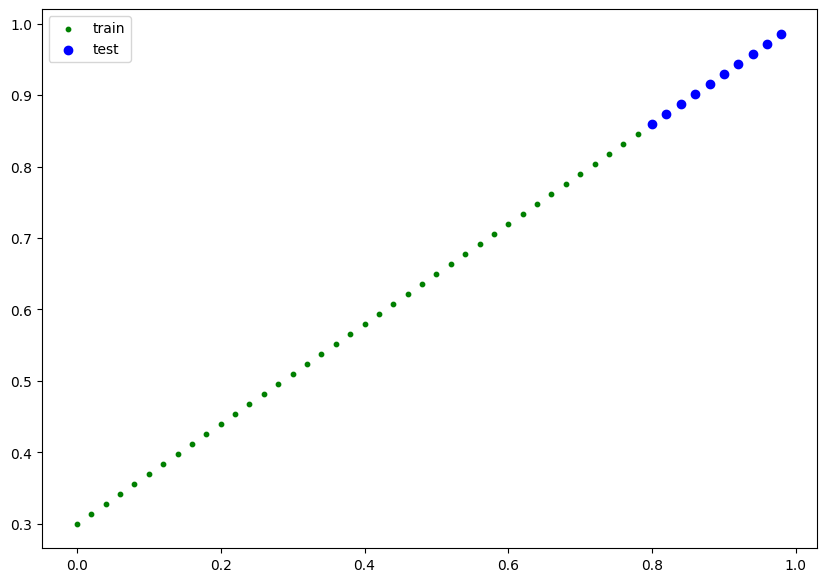

In [102]:
plot_predictions()

building the first pytorch model

In [103]:
from torch import nn
#create a linear regression model class

class LinearRegModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

    self.bias=nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))

#forward menthod to define computation in    the model

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight*x+self.bias


In [104]:
#creating a random seed
# torch.manual_seed(42)

model_0=LinearRegModel()  #commented line 2 and 4 at 6.42.43,tyo vanda agadi chai commented theana

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

dont forget to search difference between torch.rand and torch.randn

In [105]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [106]:
with torch.inference_mode():
  y_preds=model_0(x_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [107]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

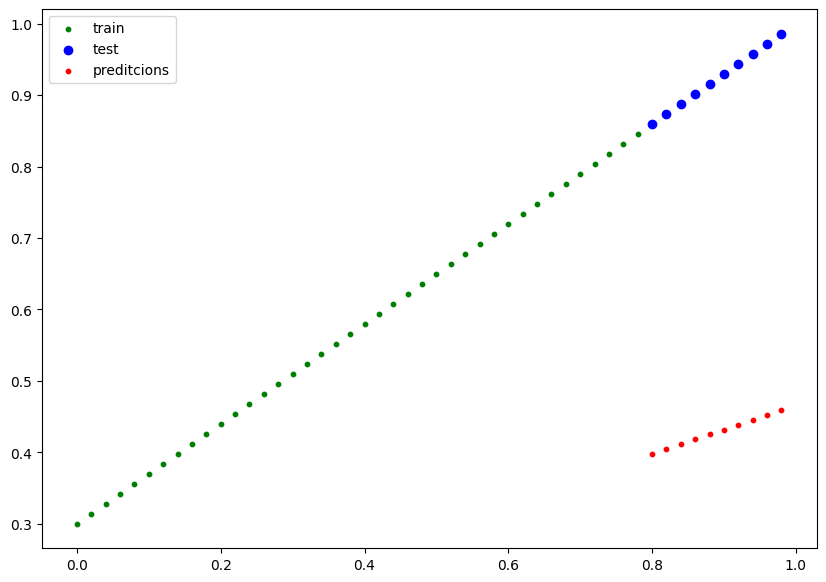

In [108]:
plot_predictions(predictions=y_preds)

In [109]:
#setting up loss func
loss_fn=nn.L1Loss()


#setting up optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)  #lr=learning rate=u need to set it ourself



In [110]:
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [116]:
torch.manual_seed(42)


#building a training and testing loop in pytorch
epochs=100  #epoch is the one  loop through the data...



#training the model

for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  #1 forward pass
  y_preds=model_0(x_train)

  #2 calculate the loss
  loss=loss_fn(y_preds,y_train)
  print(f"loss : {loss}")

  #3 optimizer zero grad
  optimizer.zero_grad()

  #4 perform backpropagartion on loss with respect to the paraeters of the model
  loss.backward()

  #5 step the optimizer(perform gradient decent)
  optimizer.step()



  model_0.eval() #turns off the gradient tracking
  print(model_0.state_dict())
#6.60.1

loss : 0.024458957836031914
OrderedDict([('weight', tensor([0.5800])), ('bias', tensor([0.3503]))])
loss : 0.024110013619065285
OrderedDict([('weight', tensor([0.5818])), ('bias', tensor([0.3498]))])
loss : 0.02376994863152504
OrderedDict([('weight', tensor([0.5834])), ('bias', tensor([0.3488]))])
loss : 0.02342480979859829
OrderedDict([('weight', tensor([0.5852])), ('bias', tensor([0.3483]))])
loss : 0.023080935701727867
OrderedDict([('weight', tensor([0.5868])), ('bias', tensor([0.3473]))])
loss : 0.022739607840776443
OrderedDict([('weight', tensor([0.5886])), ('bias', tensor([0.3468]))])
loss : 0.022391926497220993
OrderedDict([('weight', tensor([0.5902])), ('bias', tensor([0.3458]))])
loss : 0.022054409608244896
OrderedDict([('weight', tensor([0.5920])), ('bias', tensor([0.3453]))])
loss : 0.02170540764927864
OrderedDict([('weight', tensor([0.5938])), ('bias', tensor([0.3448]))])
loss : 0.021366719156503677
OrderedDict([('weight', tensor([0.5954])), ('bias', tensor([0.3438]))])
los

In [117]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [118]:
weight,bias

(0.7, 0.3)

In [119]:
with torch.inference_mode():
   y_preds_new=model_0(x_test)


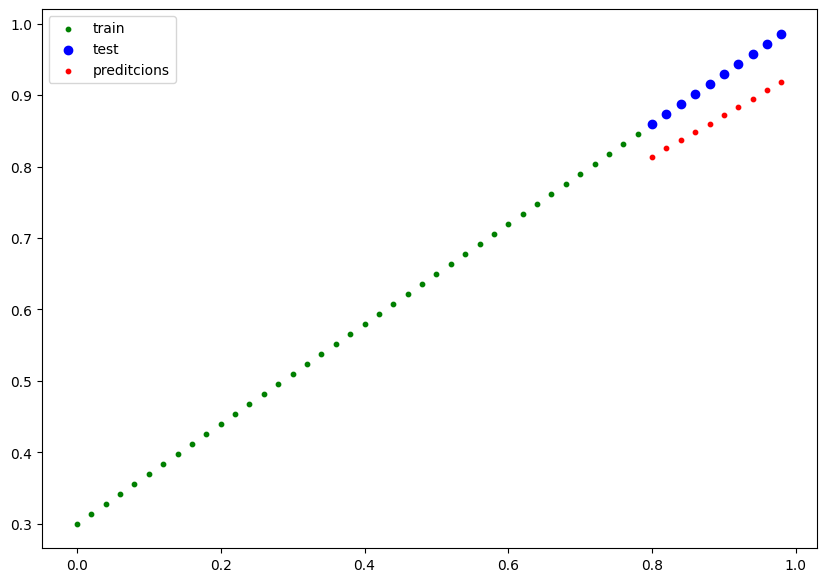

In [115]:
plot_predictions(predictions=y_preds_new);

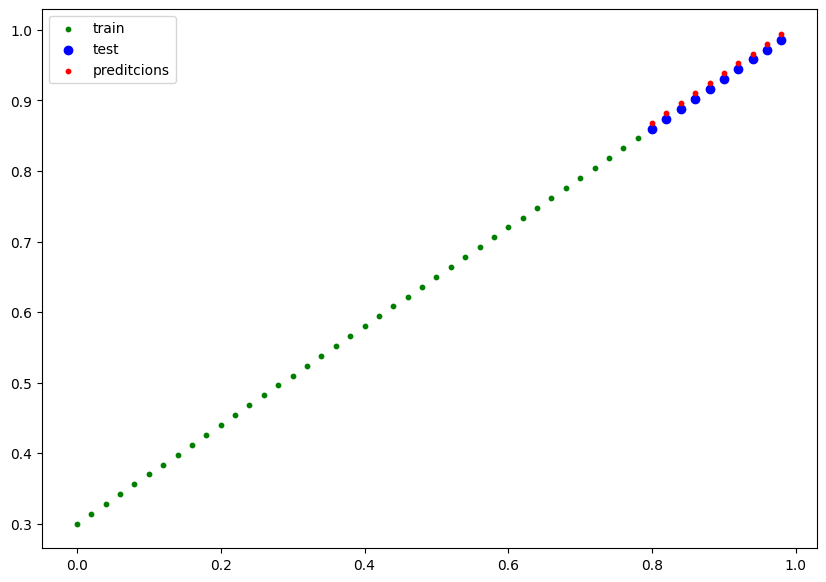

In [120]:
plot_predictions(predictions=y_preds_new);